Camilo Ruiz Bermudez, Natalia Lopez Gallego, Juan Pablo Gomez Veira y Sebastian Belalcazar Mosquera

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = 'https://drive.google.com/uc?id=1Uiqy2oX-abvxwHw8j-NtT3C9K47AESIO'

df = pd.read_csv(url)

df.head(150)

,Fecha de radicacion,Hora radicacion (UTC),Hora radicacion (COT),Fecha de inicio de soporte,Hora de inicio de soporte,Fecha de fin de soporte,Hora de fin de soporte
0,2023-08-18,19:47:05.000,14:47:05,2023-08-18,15:10:02,2023-08-18,15:17:06
1,2023-08-18,21:30:14.000,16:30:14,2023-08-18,16:45:39,2023-08-18,16:45:40
2,2023-08-19,14:24:44.000,9:24:44,2023-08-19,11:14:52,2023-08-19,11:15:05
3,2023-08-19,15:59:07.000,10:59:07,2023-08-19,11:59:40,2023-08-19,11:59:54
4,2023-08-19,16:18:57.000,11:18:57,2023-08-19,11:34:25,2023-08-19,11:34:33
5,2023-08-19,16:27:34.000,11:27:34,2023-08-19,12:27:35,2023-08-19,12:27:48
6,2023-08-22,12:36:34.000,7:36:34,2023-08-22,8:24:32,2023-08-22,8:26:00
7,2023-08-22,13:45:18.000,8:45:18,2023-08-22,9:01:02,2023-08-22,9:20:22
8,2023-08-22,13:55:26.000,8:55:26,2023-08-22,9:52:25,2023-08-23,9:53:29
9,2023-08-22,14:20:18.000,9:20:18,2023-08-22,9:59:59,2023-08-22,10:00:33


URL de archivo CSV de 10 tickets: https://drive.google.com/file/d/1Uiqy2oX-abvxwHw8j-NtT3C9K47AESIO/view?usp=sharing

In [ ]:
df["Hora radicacion (COT)"] = pd.to_datetime(df["Hora radicacion (COT)"], format="%H:%M:%S")
df["Hora de inicio de soporte"] = pd.to_datetime(df["Hora de inicio de soporte"], format="%H:%M:%S")
df["Hora de fin de soporte"] = pd.to_datetime(df["Hora de fin de soporte"], format="%H:%M:%S")

df["TPR"] = (df["Hora de fin de soporte"] - df["Hora de inicio de soporte"]).dt.total_seconds() / 60  # En minutos

df["TPPR"] = (df["Hora de inicio de soporte"] - df["Hora radicacion (COT)"]).dt.total_seconds() / 60  # En minutos

tpr_promedio = np.mean(df["TPR"])

tppr_promedio = np.mean(df["TPPR"])

print("Tiempo Promedio de Resolución (TPR):", tpr_promedio, "minutos")
print("Tiempo Promedio de Primera Respuesta (TPPR):", tppr_promedio, "minutos")

Tiempo Promedio de Resolución (TPR): 3.0316666666666663 minutos
Tiempo Promedio de Primera Respuesta (TPPR): 44.49 minutos


##Testing V2


Text(0, 0.5, 'Frecuencia')

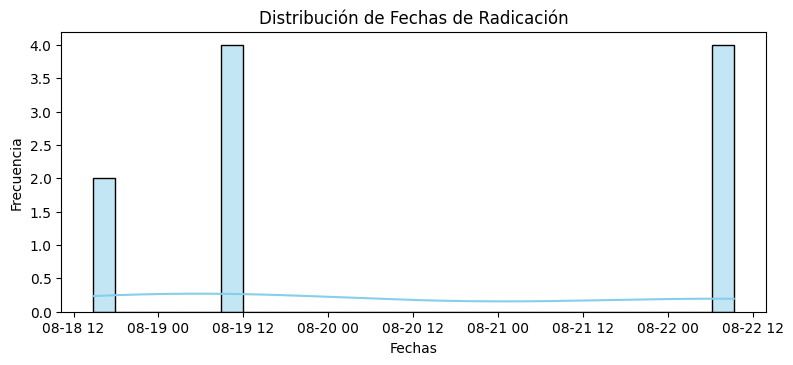

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Fecha de radicacion'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Fechas de Radicación')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

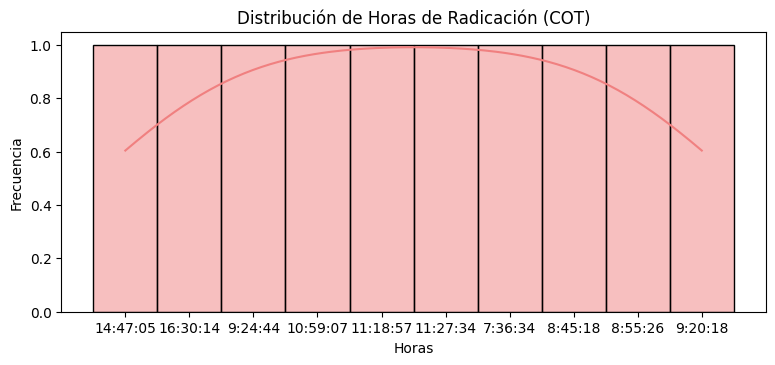

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 2)
sns.histplot(df['Hora radicacion (COT)'], kde=True, bins=20, color='lightcoral')
plt.title('Distribución de Horas de Radicación (COT)')
plt.xlabel('Horas')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

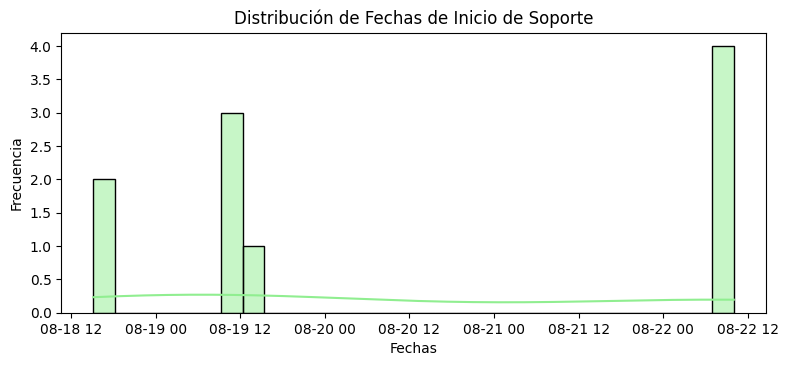

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 3)
sns.histplot(df['Fecha de inicio de soporte'], kde=True, bins=30, color='lightgreen')
plt.title('Distribución de Fechas de Inicio de Soporte')
plt.xlabel('Fechas')
plt.ylabel('Frecuencia')

##TPR TPPR

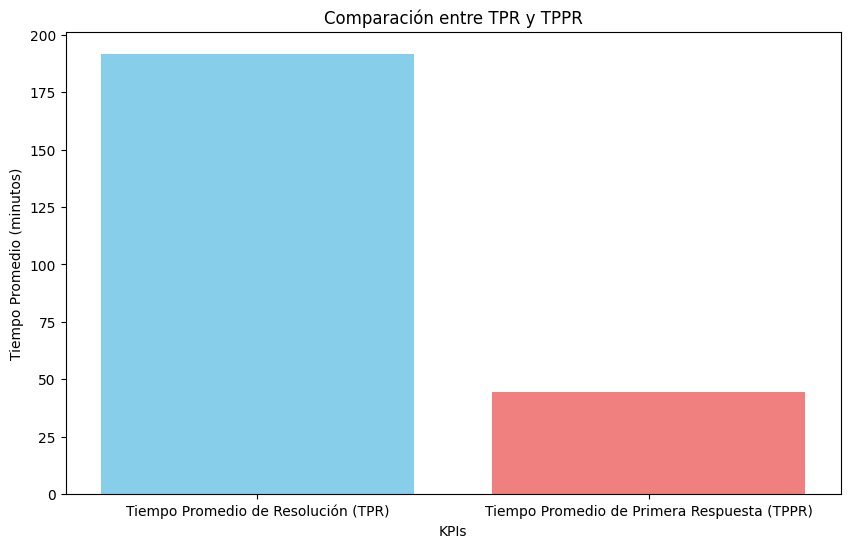

In [ ]:
df['tiempo_resolucion'] = (df['Fecha de fin de soporte'] - df['Fecha de radicacion']).dt.total_seconds() / 60

df['tiempo_primera_respuesta'] = (df['Fecha de inicio de soporte'] - df['Fecha de radicacion']).dt.total_seconds() / 60


TAR = df['tiempo_resolucion'].mean()
TAPR = df['tiempo_primera_respuesta'].mean()

kpi_names = ['Tiempo Promedio de Resolución (TPR)', 'Tiempo Promedio de Primera Respuesta (TPPR)']

kpi_values = [TAR, TAPR]


colors = ['skyblue', 'lightcoral']


plt.figure(figsize=(10, 6))
plt.bar(kpi_names, kpi_values, color=colors)

plt.xlabel('KPIs')
plt.ylabel('Tiempo Promedio (minutos)')
plt.title('Comparación entre TPR y TPPR')

plt.show()